In [1]:
# prompt: give the code to take datset.csv as input

import pandas as pd

# Assuming 'dataset.csv' is in the current working directory
# If not, specify the full path to the file.
try:
  df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')
  print("Successfully loaded dataset.csv")
  # Now you can work with the DataFrame 'df'
  # Example: print the first 5 rows
  print(df.head())
except FileNotFoundError:
  print("Error: dataset.csv not found. Please check the file path.")
except pd.errors.ParserError:
  print("Error: Could not parse dataset.csv. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Successfully loaded dataset.csv
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2

In [3]:
# prompt: What are the summary statistics (mean, median, standard deviation, skewness, and kurtosis) for key numerical variables such as balance, credit score, and transaction count? for above data

import pandas as pd
import numpy as np

# Assuming 'dataset.csv' is in the current working directory
# If not, specify the full path to the file.
try:
  df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')
  print("Successfully loaded dataset.csv")

  # Calculate summary statistics for numerical variables
  numerical_vars = ['Balance', 'CreditScore', 'TransactionCount']  # Replace with actual column names

  for var in numerical_vars:
      if var in df.columns:
          mean = df[var].mean()
          median = df[var].median()
          std_dev = df[var].std()

          # Skewness and kurtosis
          skewness = df[var].skew()
          kurtosis = df[var].kurt()
          print(f"\nSummary statistics for {var}:")
          print(f"  Mean: {mean}")
          print(f"  Median: {median}")
          print(f"  Standard Deviation: {std_dev}")
          print(f"  Skewness: {skewness}")
          print(f"  Kurtosis: {kurtosis}")
      else:
          print(f"Warning: Column '{var}' not found in the dataset.")

except FileNotFoundError:
  print("Error: dataset.csv not found. Please check the file path.")
except pd.errors.ParserError:
  print("Error: Could not parse dataset.csv. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Successfully loaded dataset.csv

Summary statistics for Balance:
  Mean: 76485.889288
  Median: 97198.54000000001
  Standard Deviation: 62397.40520238623
  Skewness: -0.14110871094154384
  Kurtosis: -1.489411767941925

Summary statistics for CreditScore:
  Mean: 650.5288
  Median: 652.0
  Standard Deviation: 96.65329873613061
  Skewness: -0.07160660820092675
  Kurtosis: -0.42572568480291295


In [7]:
# prompt: What is the distribution of customers by gender, geography, and age?

import pandas as pd

# Assuming 'df' is your DataFrame loaded from 'dataset.csv'
# If not, load the DataFrame first as in the previous response.

# Distribution of customers by gender
gender_distribution = df['Gender'].value_counts(normalize=True) * 100
print("\nDistribution of Customers by Gender:")
print(gender_distribution)

# Distribution of customers by geography
geography_distribution = df['Geography'].value_counts(normalize=True) * 100
print("\nDistribution of Customers by Geography:")
print(geography_distribution)


# Distribution of customers by age group (you can define age groups)
# Example: Create age groups (adjust bins as needed)
bins = [0, 18, 30, 45, 60, 100]  # Example age group boundaries
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_distribution = df['AgeGroup'].value_counts(normalize=True) * 100
print("\nDistribution of Customers by Age Group:")
print(age_group_distribution)


# Combined distribution (example: Gender and Geography)
gender_geo_distribution = df.groupby(['Gender', 'Geography']).size().unstack(fill_value=0)
print("\nDistribution of Customers by Gender and Geography:")
gender_geo_distribution

# Further analysis with pivot tables or crosstabs for multiple variables



Distribution of Customers by Gender:
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

Distribution of Customers by Geography:
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

Distribution of Customers by Age Group:
AgeGroup
31-45    60.19
46-60    18.14
19-30    16.41
61+       5.26
0-18      0.00
Name: proportion, dtype: float64

Distribution of Customers by Gender and Geography:


Geography,France,Germany,Spain
Gender,,,
Female,2261,1193,1089
Male,2753,1316,1388


In [10]:
# prompt: What are the minimum, maximum, and average transaction counts of active vs. inactive customers? from above data

# Assuming 'df' is your DataFrame loaded from 'dataset.csv'

# Check for the correct column name (case-sensitive)
# Print the available columns for inspection
print(df.columns)

# If the column name is different, update it here:
transaction_count_col = 'Point Earned' # Replace with the actual column name if different

# Group data by 'IsActiveMember' and get transaction statistics
transaction_stats = df.groupby('IsActiveMember')[transaction_count_col].agg(['min', 'max', 'mean'])

print("\nTransaction Statistics by Active Status:")
transaction_stats

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'AgeGroup'],
      dtype='object')

Transaction Statistics by Active Status:


,min,max,mean
IsActiveMember,,,
0,119,1000,607.675397
1,206,1000,605.422831



Correlation Matrix:
              CreditScore   Balance  Point Earned
CreditScore      1.000000  0.006268      0.000077
Balance          0.006268  1.000000      0.014608
Point Earned     0.000077  0.014608      1.000000


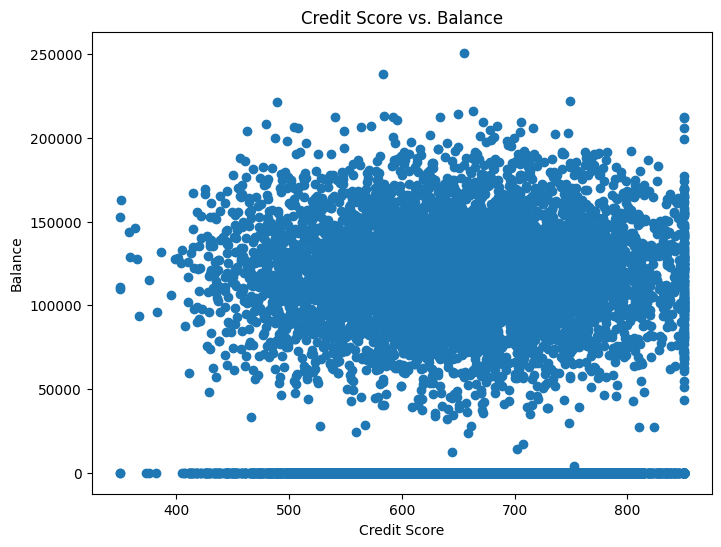

In [11]:
# prompt: How are variables like credit score, balance, and transaction count related?

# Correlation matrix
correlation_matrix = df[['CreditScore', 'Balance', 'Point Earned']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualizations (example: scatter plot of CreditScore vs. Balance)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df['CreditScore'], df['Balance'])
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.title('Credit Score vs. Balance')
plt.show()

# ... similar plots for other pairs of variables



Balance Statistics by Churn Status:
                mean     median           std
Exited                                       
0       72742.750663   92063.06  62851.577108
1       91109.476006  109344.23  58346.483197

Transaction Statistics by Churn Status:
              mean  median         std
Exited                                
0       607.044084   603.0  226.091682
1       604.448479   610.5  225.315301


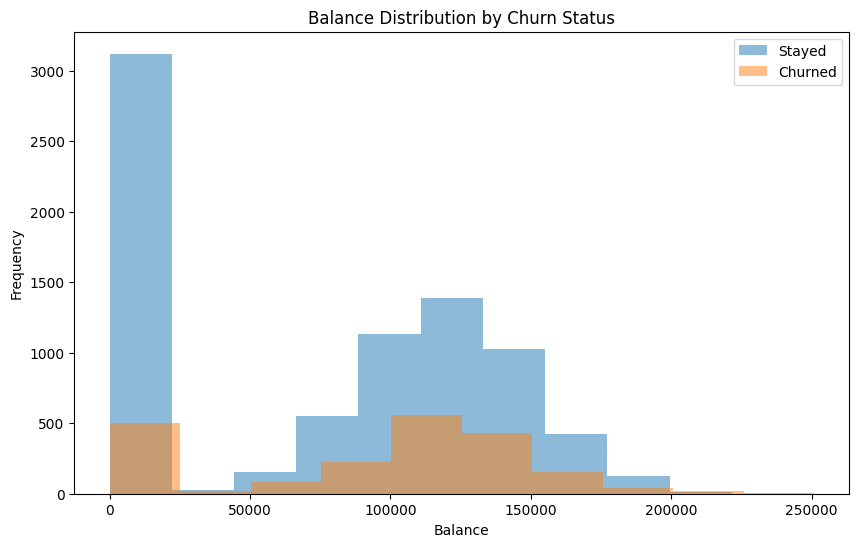

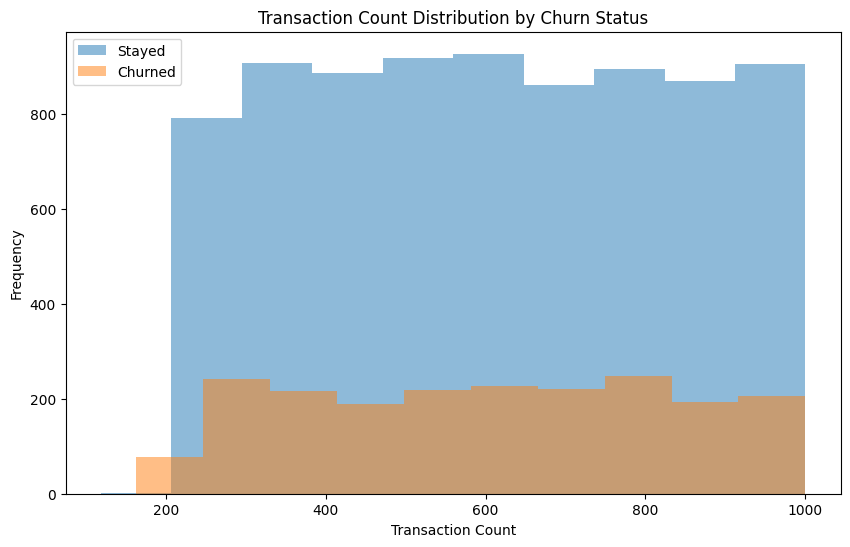

In [12]:
# prompt: What are the differences in balance and transaction activity between customers who stayed and those who churned?

# Assuming 'df' is your DataFrame loaded from 'dataset.csv' and already contains the 'Exited' column.

# Group data by 'Exited' (churned or not) and get balance statistics
balance_stats = df.groupby('Exited')['Balance'].agg(['mean', 'median', 'std'])

print("\nBalance Statistics by Churn Status:")
print(balance_stats)

# Group data by 'Exited' and get transaction count statistics
transaction_stats = df.groupby('Exited')['Point Earned'].agg(['mean', 'median', 'std'])

print("\nTransaction Statistics by Churn Status:")
print(transaction_stats)


# Visualizations to compare balance distributions for churned and non-churned customers
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.hist(df[df['Exited'] == 0]['Balance'], alpha=0.5, label='Stayed')
plt.hist(df[df['Exited'] == 1]['Balance'], alpha=0.5, label='Churned')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Balance Distribution by Churn Status')
plt.legend()
plt.show()

# Visualizations to compare transaction counts for churned and non-churned customers
plt.figure(figsize=(10, 6))
plt.hist(df[df['Exited'] == 0]['Point Earned'], alpha=0.5, label='Stayed')
plt.hist(df[df['Exited'] == 1]['Point Earned'], alpha=0.5, label='Churned')

plt.xlabel('Transaction Count') # Assuming 'Point Earned' represents transaction counts
plt.ylabel('Frequency')
plt.title('Transaction Count Distribution by Churn Status')
plt.legend()
plt.show()


In [13]:
# prompt: What is the probability that a customer has both a low credit score and a high balance?

# Assuming 'df' is your DataFrame loaded from 'dataset.csv'

# Define thresholds for 'low credit score' and 'high balance'
low_credit_score_threshold = 500  # Example threshold, adjust as needed
high_balance_threshold = 100000 # Example threshold, adjust as needed

# Filter the DataFrame based on the defined thresholds
low_credit_high_balance_customers = df[(df['CreditScore'] < low_credit_score_threshold) & (df['Balance'] > high_balance_threshold)]

# Calculate the probability
probability = len(low_credit_high_balance_customers) / len(df)

print(f"The probability that a customer has both a low credit score (< {low_credit_score_threshold}) and a high balance (> {high_balance_threshold}) is: {probability:.4f}")


The probability that a customer has both a low credit score (< 500) and a high balance (> 100000) is: 0.0317
